In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', 50)

## Importing the Data

In [8]:
df = pd.read_excel("/content/Telco_customer_churn.xlsx")

In [9]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
df.shape

(7043, 33)

In [11]:
df.drop(columns=['Churn Label', 'Churn Score', "CLTV", 'Churn Reason'], inplace=True)

In [12]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1


Check unique values in different columns

In [13]:
df['Count'].unique()

array([1])

In [14]:
df['Country'].unique()

array(['United States'], dtype=object)

In [15]:
df['State'].unique()

array(['California'], dtype=object)

- Remove these variables as they contain only one type of value.
- Remove CustomerID and Lat Long combined column

In [16]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis=1, inplace=True)
df.head(3)

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1


In [17]:
df['City'] = df['City'].str.replace(' ', '_')

In [18]:
df['City'].unique()[:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [19]:
df.columns = df.columns.str.replace(' ', '_')
df.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1


## Identifying Missing Data

In [20]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

Verify the data type of values for each column

In [21]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [23]:
# change the datatype to numeric
# df['Total_Charges'] = df['Total_Charges'].astype(float)

Gives an error as the values may not be in the proper format

## Dealing with the Missing Data

In [24]:
len(df.loc[df['Total_Charges'] == ' '])

11

11 rows with missing data

In [25]:
# update these values to 0
df.loc[df['Total_Charges'] == ' ', 'Total_Charges'] = 0

In [26]:
# change the data type
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [27]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [28]:
# replace the spaces everywhere with underscores so that we can print the tree
df.replace(' ', '_', regex=True, inplace=True)
df.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1


## Format the Data

### Split Into Dependent and Independent Variables

In [29]:
X, y = df.iloc[:, :-1].copy(), df.iloc[:, -1].copy()

In [30]:
X.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50


In [31]:
y.head(3)

0    1
1    1
2    1
Name: Churn_Value, dtype: int64

### One-Hot Encoding

In [32]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

All the data in each categorical column is in proper format

In [33]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head(3)

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso_Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,...,Online_Security_Yes,Online_Backup_No,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0


Verify that y only contains 0s and 1s

In [34]:
y.unique()

array([1, 0])

## Build a Preliminary Xgboost Model

Check if the data is imbalanced

In [35]:
sum(y)/len(y)

0.2653698707936959

In [36]:
# make a stratified split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

Verify the stratify

In [37]:
sum(y_train)/len(y_train)

0.2654297614539947

In [38]:
sum(y_test)/len(y_test)

0.26519023282226006

In [39]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            early_stopping_rounds=10,
                            eval_metric='aucpr', missing=0, seed=42)
xgb_clf.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)]);

[0]	validation_0-aucpr:0.64139
[1]	validation_0-aucpr:0.65161
[2]	validation_0-aucpr:0.66003
[3]	validation_0-aucpr:0.65769
[4]	validation_0-aucpr:0.65817
[5]	validation_0-aucpr:0.65415
[6]	validation_0-aucpr:0.65875
[7]	validation_0-aucpr:0.66285
[8]	validation_0-aucpr:0.66159
[9]	validation_0-aucpr:0.66108
[10]	validation_0-aucpr:0.66028
[11]	validation_0-aucpr:0.66205
[12]	validation_0-aucpr:0.66114
[13]	validation_0-aucpr:0.65998
[14]	validation_0-aucpr:0.65746
[15]	validation_0-aucpr:0.65641
[16]	validation_0-aucpr:0.65939
[17]	validation_0-aucpr:0.65845


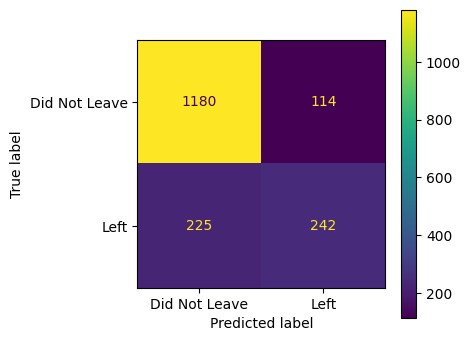

In [40]:
# draw the confusion matrix
import matplotlib.pyplot as plt

y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Did Not Leave', 'Left'])
cm_plot.plot(ax=ax)
plt.show()

Of the **225 + 242 = 467** people that left the company, **242 (51.82%)** were classified correctly.

Improve the parameters using Cross Validation

In [57]:
# Round 1
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

param_grid = {
    'max_depth': [4],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20.0, 30.0],
    'scale_pos_weight': [3]
}

# To speed up cross validation, and to futher prevent overfitting, we are only using a random subset of data (90%)
# and are using only a random subset of features (columns) (50%) per tree
optimal_params = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',
                                                seed=42,
                                                subsample=0.9,
                                                colsample_bytree=0.5),
                                                param_grid,
                                                scoring='roc_auc',
                                                verbose=0,
                                                n_jobs=10,
                                                cv=3)

optimal_params.fit(X_train,
                   y_train,
                   verbose=False,
                   eval_set=[(X_test, y_test)])


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4], 'reg_lambda': [1.0, 5.0, 10.0],
                         'scale_pos_weight': [1]},
             scoring='roc_auc')

In [58]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

# Building and Evaluating the optimal XgBoost Model

Use the ideal parameters values, we can build the final xgboost model

In [67]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective="binary:logistic",
                            gamma=0.25,
                            learning_rate=0.05,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            early_stopping_rounds=10,
                            subsample=0.9,
                            colsample_bytree=0.5)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.69599
[1]	validation_0-logloss:0.68066
[2]	validation_0-logloss:0.66689
[3]	validation_0-logloss:0.65459
[4]	validation_0-logloss:0.64290
[5]	validation_0-logloss:0.63138
[6]	validation_0-logloss:0.62179
[7]	validation_0-logloss:0.61230
[8]	validation_0-logloss:0.60326
[9]	validation_0-logloss:0.59562
[10]	validation_0-logloss:0.58835
[11]	validation_0-logloss:0.58093
[12]	validation_0-logloss:0.57490
[13]	validation_0-logloss:0.56952
[14]	validation_0-logloss:0.56406
[15]	validation_0-logloss:0.55914
[16]	validation_0-logloss:0.55599
[17]	validation_0-logloss:0.55147
[18]	validation_0-logloss:0.54712
[19]	validation_0-logloss:0.54297
[20]	validation_0-logloss:0.53930
[21]	validation_0-logloss:0.53591
[22]	validation_0-logloss:0.53234
[23]	validation_0-logloss:0.52928
[24]	validation_0-logloss:0.52658
[25]	validation_0-logloss:0.52425
[26]	validation_0-logloss:0.52192
[27]	validation_0-logloss:0.51933
[28]	validation_0-logloss:0.51663
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Draw another confusion matrix to contrast the new model predictions with the old model

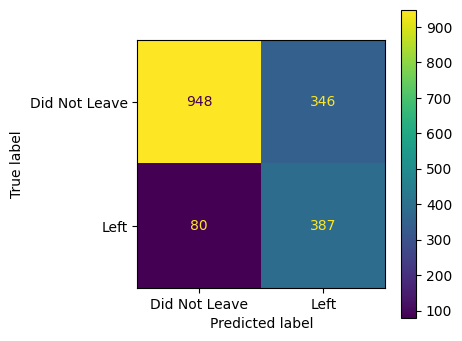

In [68]:
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Did Not Leave', 'Left'])
cm_plot.plot(ax=ax)
plt.show()

Of the **80 + 387 = 467** people that left the company, **387 (82.86%)** were classified correctly. Before optimization, we correctly classified only **51%**, which shows a drastic improvement. However, this also cost the accuracy for classifying people who did not leave the company.  